### Artificial neural network ANN Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [19]:
df = df.drop('id',axis=1)

In [20]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['month'] = df['date'].apply(lambda date:date.month)

In [23]:
df['year'] = df['date'].apply(lambda date:date.year)

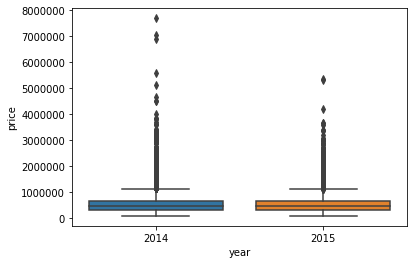

In [24]:
sns.boxplot(x='year',y='price',data=df)

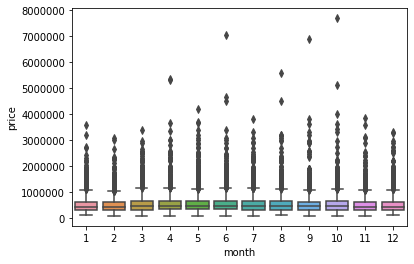

In [25]:
sns.boxplot(x='month',y='price',data=df)

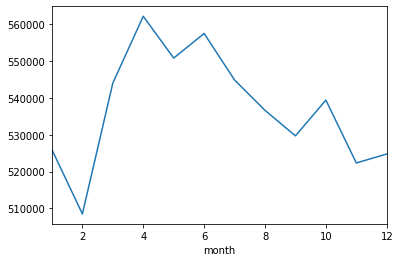

In [26]:
df.groupby('month').mean()['price'].plot()

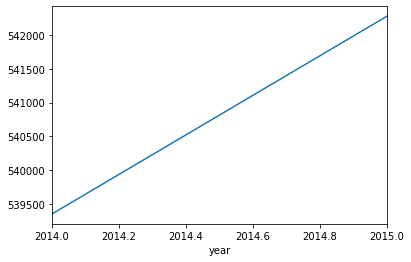

In [27]:
df.groupby('year').mean()['price'].plot()

In [28]:
df = df.drop('date',axis=1)

In [29]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [30]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [31]:
df = df.drop('zipcode',axis=1)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [33]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [34]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [35]:
X = df.drop('price',axis=1)
y = df['price']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train= scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
X_train.shape

(15117, 19)

In [43]:
X_test.shape

(6480, 19)

## Creating a Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [45]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [46]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 74us/sample - loss: 430228839929.3955 - val_loss: 418844493758.2617
Epoch 2/400
15117/15117 [==============================] - 0s 21us/sample - loss: 428253102583.9730 - val_loss: 411996069786.8642
Epoch 3/400
15117/15117 [==============================] - 0s 21us/sample - loss: 401401261499.3472 - val_loss: 351554389222.0839
Epoch 4/400
15117/15117 [==============================] - 0s 22us/sample - loss: 281418027052.1653 - val_loss: 178278463958.2815
Epoch 5/400
15117/15117 [==============================] - 0s 21us/sample - loss: 126127754575.5078 - val_loss: 95946680446.4198
Epoch 6/400
15117/15117 [==============================] - 0s 21us/sample - loss: 97670204498.9794 - val_loss: 93708013133.1160
Epoch 7/400
15117/15117 [==============================] - 0s 21us/sample - loss: 95694764310.6754 - val_loss: 91793937901.0370
Epoch 8/400
15117/15117 [=====================

15117/15117 [==============================] - 0s 21us/sample - loss: 32665666133.9938 - val_loss: 31180875164.1284
Epoch 128/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32611257821.4873 - val_loss: 31133322960.5926
Epoch 129/400
15117/15117 [==============================] - 0s 20us/sample - loss: 32587610780.3061 - val_loss: 31109388368.9086
Epoch 130/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32532602761.3225 - val_loss: 31070066824.5333
Epoch 131/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32522762140.2215 - val_loss: 31049869848.0198
Epoch 132/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32456779739.7600 - val_loss: 30991022889.0864
Epoch 133/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32441568509.6800 - val_loss: 31072597773.2741
Epoch 134/400
15117/15117 [==============================] - 0s 20us/sample - loss: 32410024930.5338 - v

15117/15117 [==============================] - 0s 21us/sample - loss: 30409109880.6250 - val_loss: 28668203351.8617
Epoch 254/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30455913509.4593 - val_loss: 28813098750.1037
Epoch 255/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30437949613.1391 - val_loss: 28386738110.2617
Epoch 256/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30388506209.7040 - val_loss: 28367340799.3679
Epoch 257/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30382620658.2491 - val_loss: 28331952921.9160
Epoch 258/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30362880877.7530 - val_loss: 28368884743.5852
Epoch 259/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30377130940.6004 - val_loss: 28326146690.2123
Epoch 260/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30345498520.2249 - v

15117/15117 [==============================] - 0s 21us/sample - loss: 29184432503.5073 - val_loss: 26707127121.5407
Epoch 380/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29192302663.5317 - val_loss: 26916886057.7185
Epoch 381/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29209242404.8666 - val_loss: 26659705383.1901
Epoch 382/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29177634422.7114 - val_loss: 26732598608.2765
Epoch 383/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29162964032.4191 - val_loss: 26640063419.7333
Epoch 384/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29135119725.1095 - val_loss: 26646387926.9136
Epoch 385/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29150060664.3032 - val_loss: 26652868825.4420
Epoch 386/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29143038606.3521 - v

In [47]:
losses = pd.DataFrame(model.history.history)

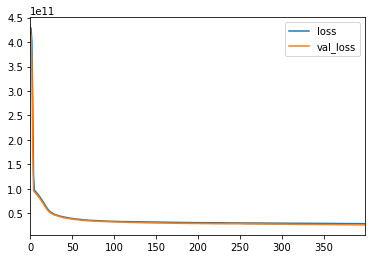

In [48]:
losses.plot()

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting New Data

In [50]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [51]:
predictions = model.predict(X_test)

In [52]:
mean_absolute_error(y_test,predictions)

101666.74811137635

In [53]:
np.sqrt(mean_squared_error(y_test,predictions))

162549.26352210157

In [54]:
explained_variance_score(y_test,predictions)

0.8009472831860807

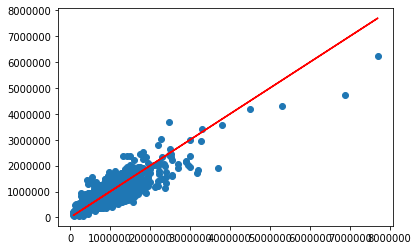

In [57]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [58]:
errors = y_test.values.reshape(6480, 1) - predictions